In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
stations = ['BFE', 'WNG', 'ESK', 'LER', 'STJ', 'OTT', 'NEW', 'VIC']
dfs = {}

In [4]:
for stat in stations:
	df = pd.read_feather(f'../data/ace_and_supermag/{stat}_prepared.feather')
	df.set_index('Date_UTC', inplace=True)
	dfs[stat] = df

In [5]:
dfs['BFE'].columns


Index(['N', 'E', 'sinMLT', 'cosMLT', 'B_Total', 'BY_GSM', 'BZ_GSM', 'Vx', 'Vy',
       'Vz', 'proton_density', 'T', 'AE_INDEX', 'SZA', 'dBHt', 'B', 'crossing',
       'persistance'],
      dtype='object')

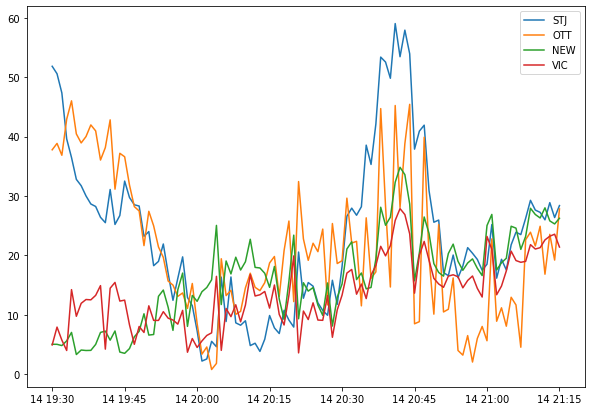

In [6]:
param = 'B'

fig = plt.figure(figsize=(10,7))
for stat in ['STJ', 'OTT', 'NEW', 'VIC']:
	plt.plot(dfs[stat][param]['2006-12-14 19:30:00':'2006-12-14 21:15:00'], label=stat)
plt.legend()	
plt.show()

In [10]:
diff_4 = {}
diff_7 = {}

for stat in stations:

	print(stat)
	combined = pd.read_feather(f'outputs/{stat}/version_5_storm_4.feather')
	sw = pd.read_feather(f'outputs/{stat}/SW_only_storm_4.feather')

	combined.set_index('Date_UTC', inplace=True)
	sw.set_index('Date_UTC', inplace=True)

	try:

		temp_combined = combined[[f'predicted_split_{i}' for i in range(100)]]
		temp_sw = sw[[f'predicted_split_{i}' for i in range(100)]]
	
	except KeyError:
		temp_combined = combined[[f'predicted_split_{i}' for i in range(10)]]
		temp_sw = sw[[f'predicted_split_{i}' for i in range(10)]]

	df = pd.DataFrame({'combined_mean':temp_combined.mean(axis=1),
					'sw_mean':temp_sw.mean(axis=1),
					'ground_truth':combined['crossing']})
	
	df['difference'] = df['combined_mean'] - df['sw_mean']

	df['ground_truth_top'] = df['ground_truth']*(1.1)
	df['ground_truth_bottom'] = df['ground_truth']*(1.01)

	diff_4[stat] = df


for stat in stations:

	print(stat)
	combined = pd.read_feather(f'outputs/{stat}/version_5_storm_7.feather')
	sw = pd.read_feather(f'outputs/{stat}/SW_only_storm_7.feather')

	combined.set_index('Date_UTC', inplace=True)
	sw.set_index('Date_UTC', inplace=True)

	try:

		temp_combined = combined[[f'predicted_split_{i}' for i in range(100)]]
		temp_sw = sw[[f'predicted_split_{i}' for i in range(100)]]
	
	except KeyError:
		temp_combined = combined[[f'predicted_split_{i}' for i in range(10)]]
		temp_sw = sw[[f'predicted_split_{i}' for i in range(10)]]

	df = pd.DataFrame({'combined_mean':temp_combined.mean(axis=1),
					'sw_mean':temp_sw.mean(axis=1),
					'ground_truth':combined['crossing']})
	
	df['difference'] = df['combined_mean'] - df['sw_mean']

	df['ground_truth_top'] = df['ground_truth']*(1.1)
	df['ground_truth_bottom'] = df['ground_truth']*(1.01)

	diff_7[stat] = df

BFE
WNG
ESK
LER
STJ
OTT
NEW
VIC
BFE
WNG
ESK
LER
STJ
OTT
NEW
VIC


In [11]:
all_diff_4 = pd.DataFrame()
all_diff_7 = pd.DataFrame()

for stat in stations:
	all_diff_4[stat] = diff_4[stat]['difference']
	all_diff_7[stat] = diff_7[stat]['difference']
all_diff_4['mean'] = all_diff_4.mean(axis=1)
all_diff_7['mean'] = all_diff_7.mean(axis=1)

In [72]:
storm_4_start_times = ['2006-12-14 16:00:00', '2006-12-15 04:45:00', '2006-12-15 22:00:00']
storm_4_end_times = ['2006-12-14 22:00:00', '2006-12-15 14:00:00', '2006-12-15 23:30:00']
storm_7_start_times = ['2015-03-17 04:05:00', '2015-03-17 08:45:00', '2015-03-17 23:00:00']
storm_7_end_times = ['2015-03-17 05:05:00', '2015-03-17 10:15:00', '2015-03-19 03:00:00']

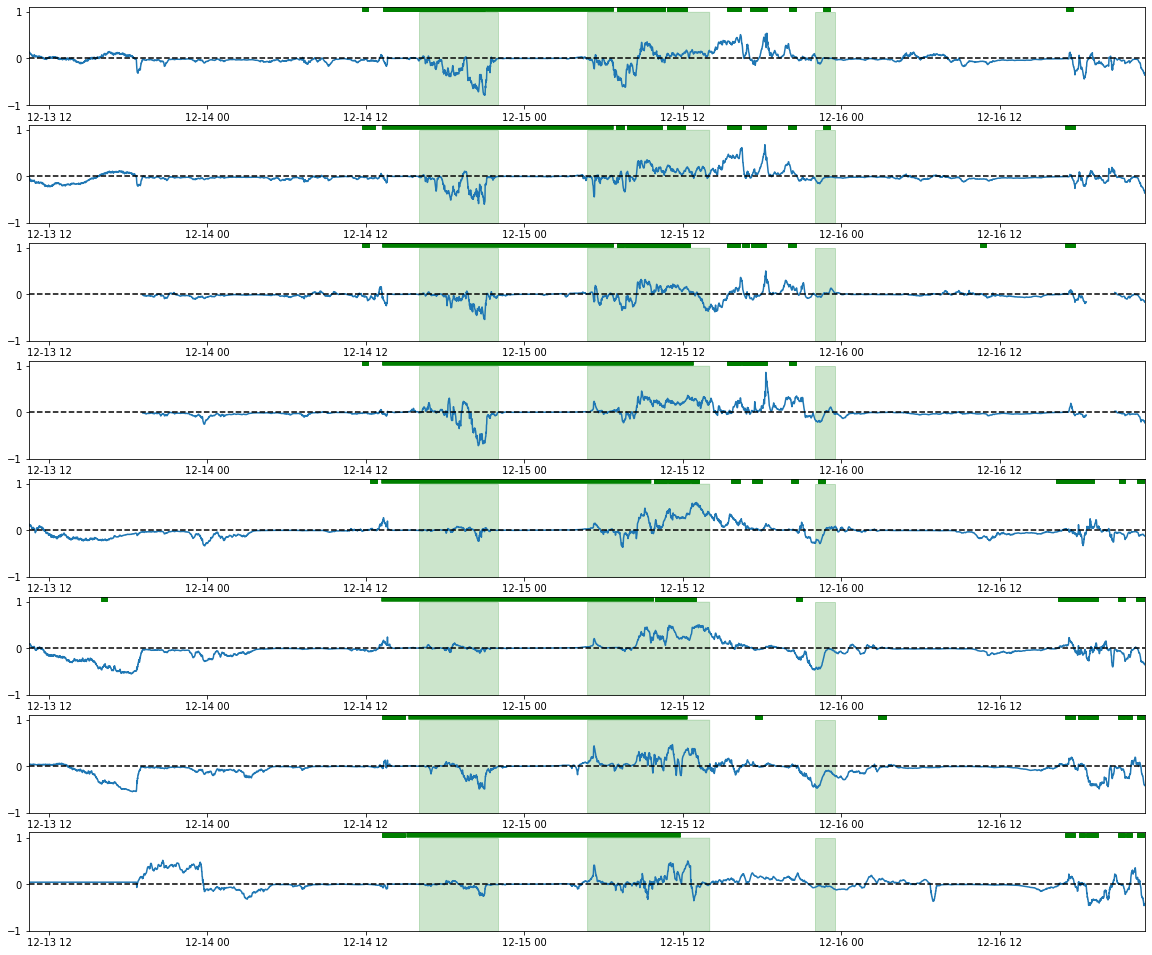

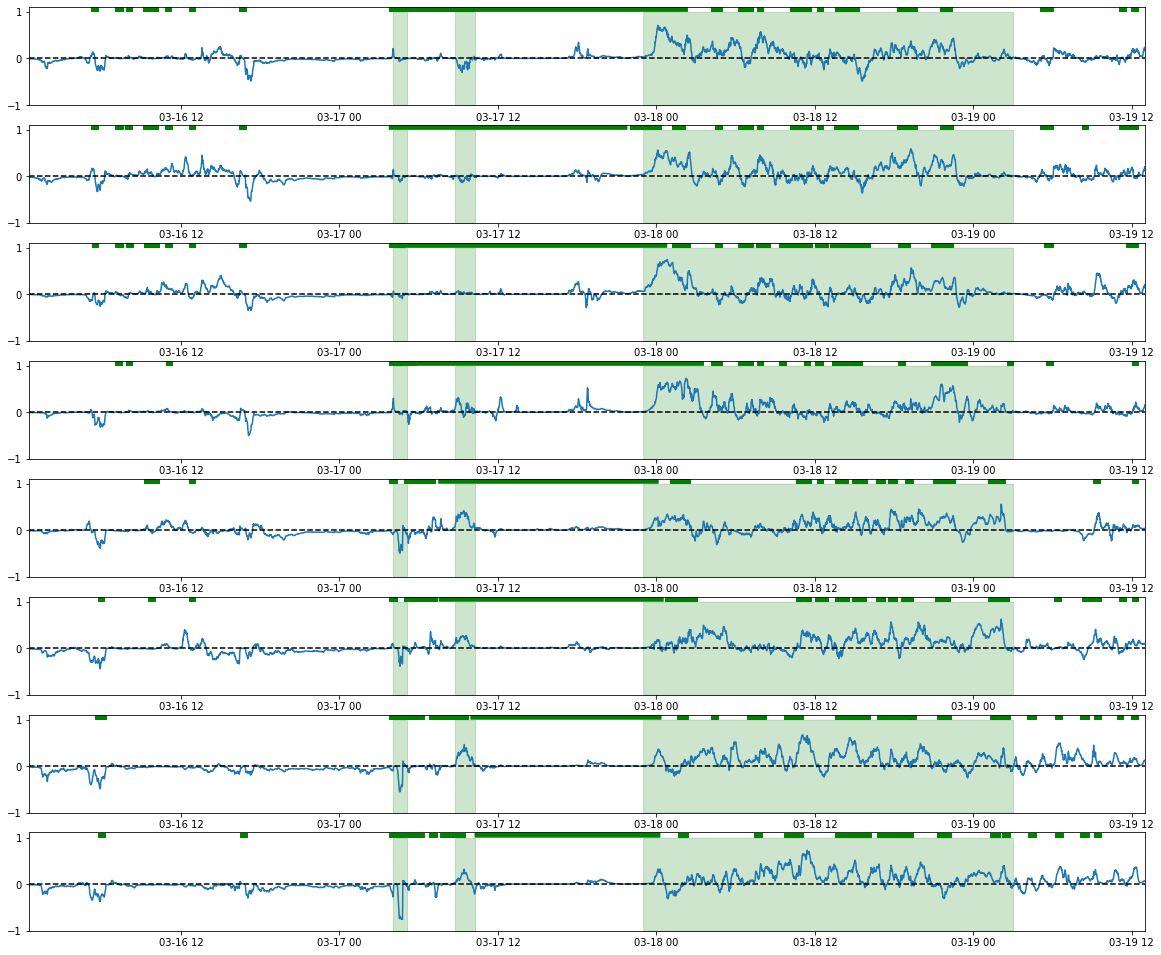

In [73]:
fig = plt.figure(figsize=(20,17))

for i, stat in enumerate(stations):
	if i == 0:
		ax = fig.add_subplot(8,1,i+1)
	else:
		ax = fig.add_subplot(8,1,i+1, sharex=ax, sharey=ax)
	df = diff_4[stat]

	ax.fill_between(df.index, df['ground_truth_bottom'], df['ground_truth_top'], 
				where=np.array(df['ground_truth_top'])>np.array(df['ground_truth_bottom']), 
				alpha=1, color='green')
	
	for s, e in zip(storm_4_start_times, storm_4_end_times):
		ax.fill_between(df[s:e].index, -1, 1, alpha=0.2, color='g')			
	
	plt.plot(df['difference'])
	plt.axhline(0, color='black', linestyle='--')	
	ax.set_ylim(-1, 1.11)
	plt.margins(x=0)
plt.savefig('plots/diff_storm_4')

fig = plt.figure(figsize=(20,17))

for i, stat in enumerate(stations):
	ax = fig.add_subplot(8,1,i+1)
	df = diff_7[stat]

	ax.fill_between(df.index, df['ground_truth_bottom'], df['ground_truth_top'], 
				where=np.array(df['ground_truth_top'])>np.array(df['ground_truth_bottom']), 
				alpha=1, color='green')
	
	for s, e in zip(storm_7_start_times, storm_7_end_times):
		ax.fill_between(df[s:e].index, -1, 1, alpha=0.2, color='g')
	
	plt.plot(df['difference'])
	plt.axhline(0, color='black', linestyle='--')	
	ax.set_ylim(-1, 1.11)
	plt.margins(x=0)
plt.savefig('plots/diff_storm_7.png')

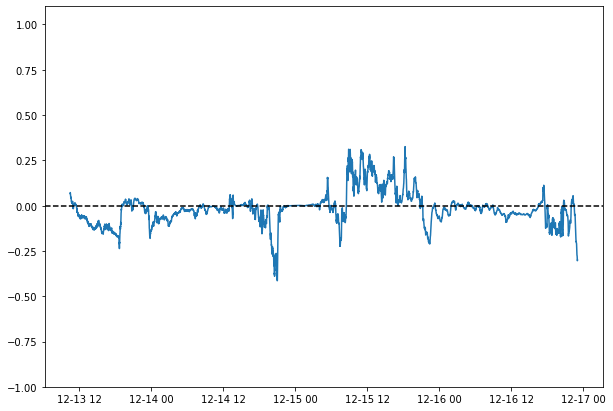

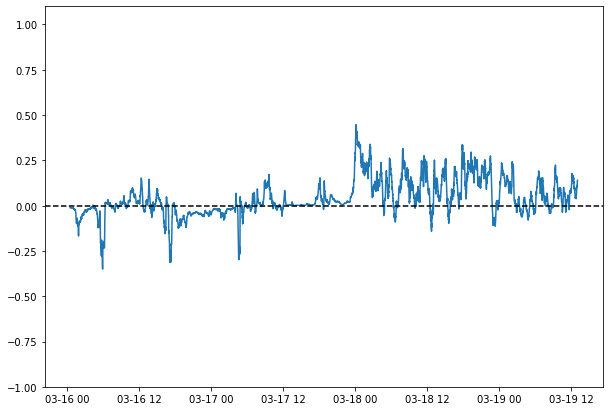

In [78]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
plt.plot(all_diff_4['mean'])
# ax.fill_between(df.index, df['ground_truth_bottom'], df['ground_truth_top'], 
# 				where=np.array(df['ground_truth_top'])>np.array(df['ground_truth_bottom']), 
# 				alpha=1, color='green')
plt.ylim(-1,1.1)
plt.axhline(0, color='black', linestyle='--')
plt.show()

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
plt.plot(all_diff_7['mean'])
# ax.fill_between(df.index, df['ground_truth_bottom'], df['ground_truth_top'], 
# 				where=np.array(df['ground_truth_top'])>np.array(df['ground_truth_bottom']), 
# 				alpha=1, color='green')
plt.ylim(-1,1.1)
plt.axhline(0, color='black', linestyle='--')
plt.show()